# Libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series


from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from xgboost import XGBRegressor 



# Read data

In [2]:
path_venda = "https://raw.githubusercontent.com/Felisouza/case_wiz_co/main/data/venda.csv"
path_receita = "https://raw.githubusercontent.com/Felisouza/case_wiz_co/main/data/receita.csv"

In [3]:
path_venda = r"C:\Users\feh_s\case_wiz_co\data\venda.csv"
path_receita = r"C:\Users\feh_s\case_wiz_co\data\receita.csv"

In [4]:
df_receita = pd.read_csv(path_receita, sep=',')
df_venda = pd.read_csv(path_venda, sep=',')

# Análise exploratória

## Análise exploratória receita

In [5]:
df_receita.head()

,ano,mes,seguradora,vendedor,tot_apolices,receita
0,2019,1,72,58,1,"65,3"
1,2019,1,72,57,4,"1360,235"
2,2019,1,72,56,3,"276,49"
3,2019,1,72,47,2,"-1707,095"
4,2019,1,72,38,3,"1080,745"


In [6]:
df_receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ano           1080 non-null   int64 
 1   mes           1080 non-null   int64 
 2   seguradora    1080 non-null   int64 
 3   vendedor      1080 non-null   int64 
 4   tot_apolices  1080 non-null   int64 
 5   receita       1080 non-null   object
dtypes: int64(5), object(1)
memory usage: 50.8+ KB


### Fix receita float

In [7]:
df_receita['receita'] = df_receita['receita'].apply(lambda x: x.replace(',', '.')).astype('float').fillna(0)

In [8]:
df_receita.head()

,ano,mes,seguradora,vendedor,tot_apolices,receita
0,2019,1,72,58,1,65.300
1,2019,1,72,57,4,1360.235
2,2019,1,72,56,3,276.490
3,2019,1,72,47,2,-1707.095
4,2019,1,72,38,3,1080.745


In [9]:
df_receita[['vendedor', 'seguradora']] = df_receita[['vendedor', 'seguradora']].astype('str')

In [10]:
df_receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano           1080 non-null   int64  
 1   mes           1080 non-null   int64  
 2   seguradora    1080 non-null   object 
 3   vendedor      1080 non-null   object 
 4   tot_apolices  1080 non-null   int64  
 5   receita       1080 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 50.8+ KB


## Estatísticas descritivas

In [11]:
df_receita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ano           1080 non-null   int64  
 1   mes           1080 non-null   int64  
 2   seguradora    1080 non-null   object 
 3   vendedor      1080 non-null   object 
 4   tot_apolices  1080 non-null   int64  
 5   receita       1080 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 50.8+ KB


In [12]:
df_receita.describe()

,ano,mes,tot_apolices,receita
count,1080.000000,1080.000000,1080.00000,1080.000000
mean,2019.352778,5.695370,3.32963,1201.460574
std,0.478056,3.195626,3.61808,4632.482693
min,2019.000000,1.000000,1.00000,-4622.065000
25%,2019.000000,3.000000,1.00000,109.560000
50%,2019.000000,5.000000,2.00000,309.747500
75%,2020.000000,8.000000,4.00000,959.635000
max,2020.000000,12.000000,34.00000,125950.595000


## Receita por ano

[Text(0, 0, '1069.97'), Text(0, 0, '1442.7')]

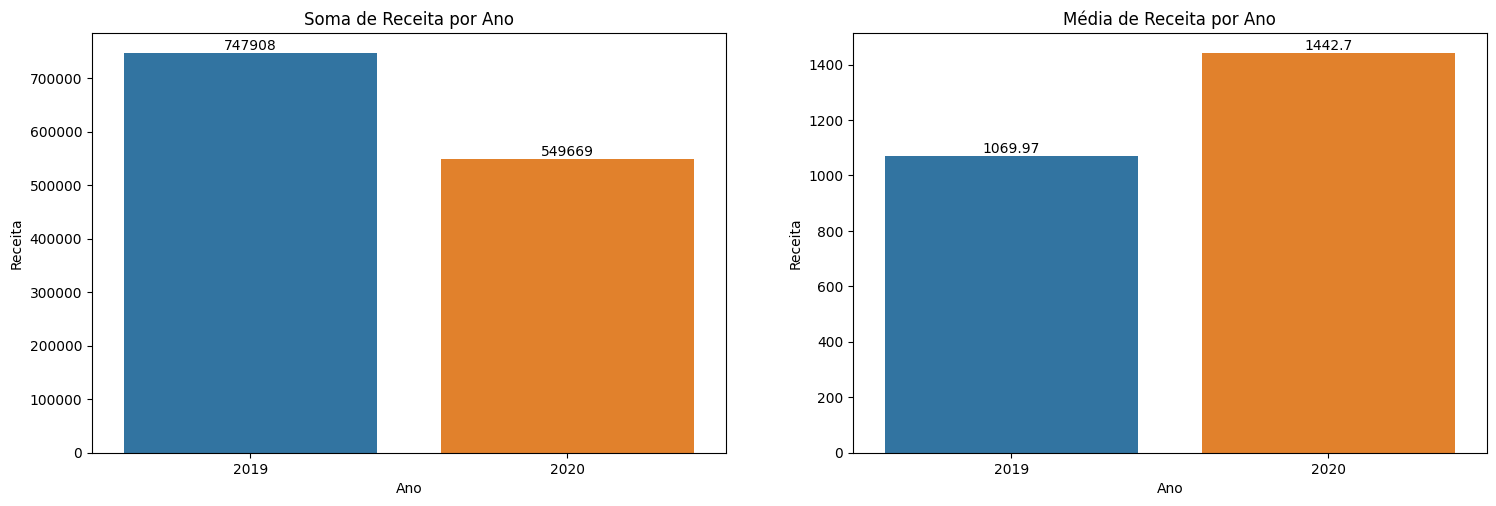

In [13]:
plt.figure(figsize=(18,12))

plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# Plotar gráfico usando Seaborn
groupedvalues = df_receita.groupby('ano').sum().reset_index()

plt.subplot(221)
ax1= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Soma de Receita por Ano')

# Exibir o gráfico
ax1.bar_label(ax1.containers[0])


groupedvalues = df_receita.groupby('ano').mean().reset_index()

plt.subplot(222)
ax= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Média de Receita por Ano')

# Exibir o gráfico
ax.bar_label(ax.containers[0])


#Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


In [14]:
df_receita.groupby('ano').count()['mes']
# Em 2019 tivemos mais vendas com valores menores.

ano
2019    699
2020    381
Name: mes, dtype: int64

## Receita por mês

[Text(0, 0, '1037.16'),
 Text(0, 0, '1180.85'),
 Text(0, 0, '1102.68'),
 Text(0, 0, '1181.96'),
 Text(0, 0, '1119.6'),
 Text(0, 0, '1282.42'),
 Text(0, 0, '839.524'),
 Text(0, 0, '936.652'),
 Text(0, 0, '1212.91'),
 Text(0, 0, '856.737'),
 Text(0, 0, '794.666'),
 Text(0, 0, '3528.83')]

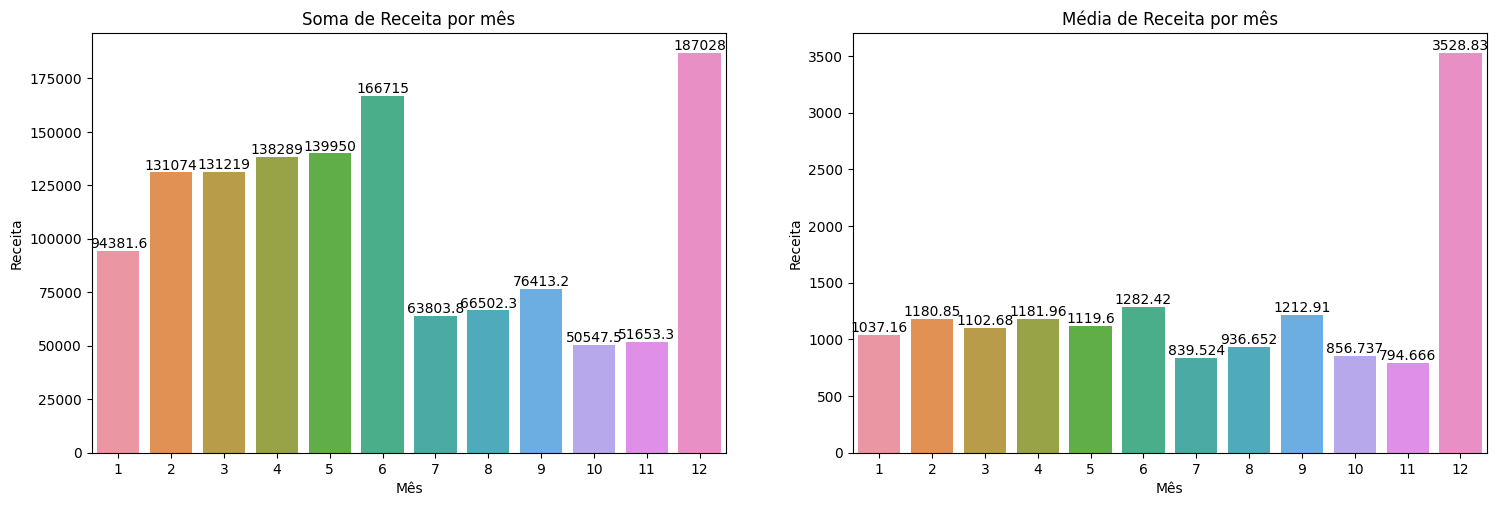

In [15]:
plt.figure(figsize=(18,12))

plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# Plotar gráfico usando Seaborn
groupedvalues = df_receita.groupby('mes').sum().reset_index()

plt.subplot(221)
ax1= sns.barplot(x='mes', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Soma de Receita por mês')

# Exibir o gráfico
ax1.bar_label(ax1.containers[0])


groupedvalues = df_receita.groupby('mes').mean().reset_index()

plt.subplot(222)
ax= sns.barplot(x='mes', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Média de Receita por mês')

# Exibir o gráfico
ax.bar_label(ax.containers[0])


#Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


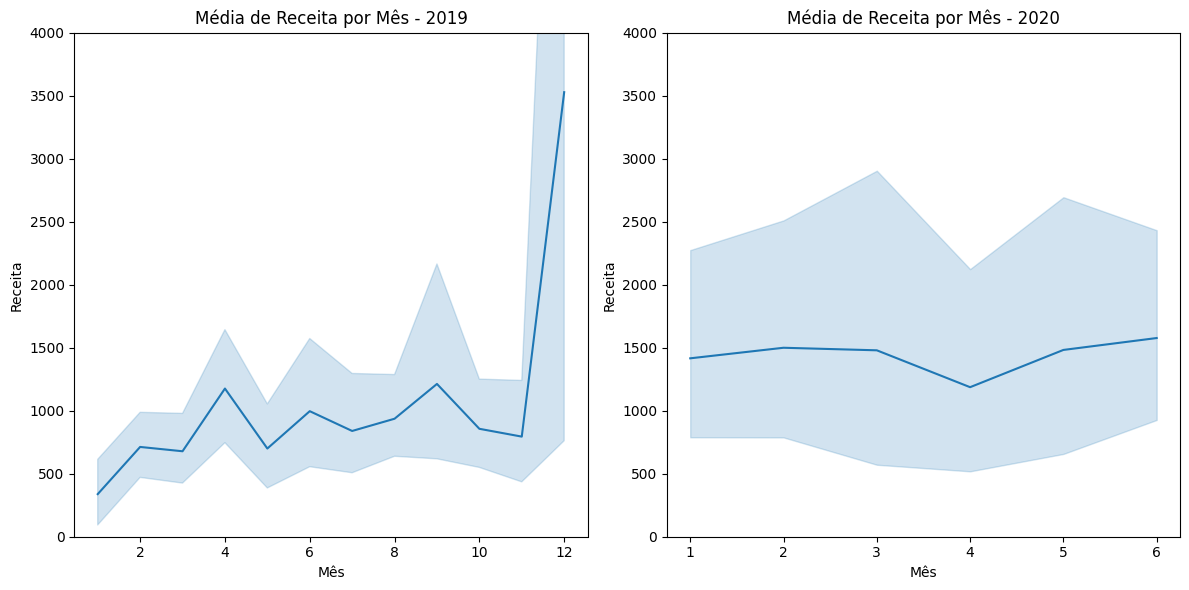

In [16]:
# Filtrar os dados de 2019
dados_2019 = df_receita[df_receita['ano'] == 2019]

# Filtrar os dados de 2020
dados_2020 = df_receita[df_receita['ano'] == 2020]

# Criar figura e eixos dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotar gráfico para 2019
sns.lineplot(x='mes', y='receita', data=dados_2019, ax=axes[0])
axes[0].set_xlabel('Mês')
axes[0].set_ylabel('Receita')
axes[0].set_title('Média de Receita por Mês - 2019')
axes[0].set(ylim=(0, 4000))

# Plotar gráfico para 2020
sns.lineplot(x='mes', y='receita', data=dados_2020, ax=axes[1])
axes[1].set_xlabel('Mês')
axes[1].set_ylabel('Receita')
axes[1].set_title('Média de Receita por Mês - 2020')
axes[1].set(ylim=(0, 4000))


# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

# Em 2019 a média da receita foi bem mais estável
# Pq esse pico em dezembro de 2019? Era esperado? 

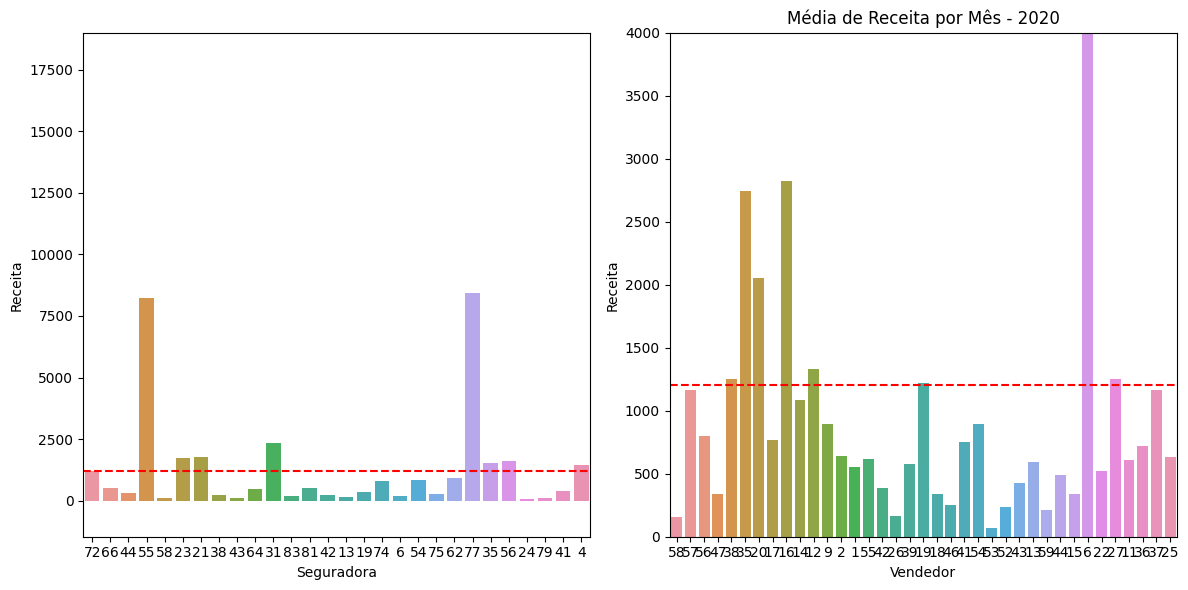

In [17]:
df_receita['vendedor'] = df_receita['vendedor'].astype(str)

# Filtrar os dados de 2019
dados_2019 = df_receita[df_receita['ano'] == 2019]

# Filtrar os dados de 2020
dados_2020 = df_receita[df_receita['ano'] == 2020]

# Criar figura e eixos dos subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotar gráfico para 2019
sns.barplot(x='seguradora', y='receita', data=df_receita, ax=axes[0], errwidth=0)
axes[0].set_xlabel('Seguradora')
axes[0].set_ylabel('Receita')
# axes[0].set(ylim=(0, 4000))

# Traçar a linha da média da receita
mean_receita = df_receita['receita'].mean()
axes[0].axhline(mean_receita, color='r', linestyle='--', label='Média')

# Plotar gráfico para 2020
sns.barplot(x='vendedor', y='receita', data=df_receita, ax=axes[1], errwidth=0)
axes[1].set_xlabel('Vendedor')
axes[1].set_ylabel('Receita')
axes[1].set_title('Média de Receita por Mês - 2020')
axes[1].set(ylim=(0, 4000))

# Traçar a linha da média da receita
mean_receita = df_receita['receita'].mean()
axes[1].axhline(mean_receita, color='r', linestyle='--', label='Média')


# Ajustar espaçamento entre os subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()

# Passar uma linha média para ver quem está abaixo ou acima da média.
# Destacar ?

In [18]:
(
    df_receita[
        (df_receita['seguradora'].isin([55, 77])) &
        (df_receita['ano'] == 2020)]
    [['receita', 'seguradora']]
    .groupby('seguradora').sum()
)

,receita
seguradora,


In [19]:
vendedores_acima_media = df_receita[df_receita['receita'] > mean_receita].nlargest(3, 'receita')

# Imprimir os vendedores acima da média de renda
print("Vendedores acima da média de renda:")
for index, row in vendedores_acima_media.iterrows():
    print(row['vendedor'], row['receita'])

Vendedores acima da média de renda:
16 125950.595
20 30301.38
20 26450.0


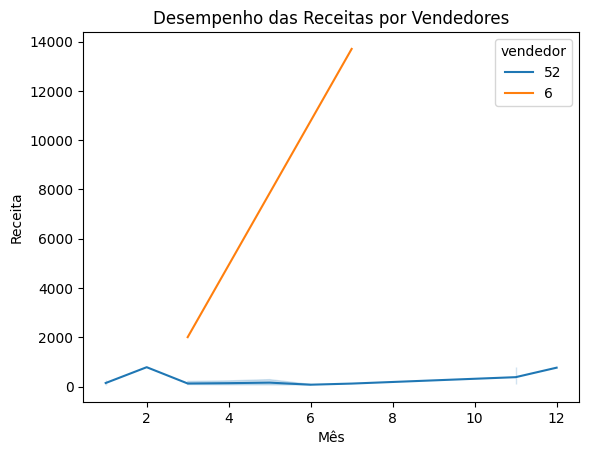

In [20]:
# Plotar gráfico usando Seaborn
sns.lineplot(x='mes', y='receita', hue='vendedor', data=df_receita[df_receita['vendedor'].isin(['6', '61', '73', '52'])])

# Configurações do gráfico
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Desempenho das Receitas por Vendedores')

# Exibir o gráfico
plt.show()

# [df_receita['seguradora'].isin([55, 56, 77])]

In [21]:
df_receita[df_receita['vendedor'].isin([6, 61, 73, 53])]['vendedor'].unique()

array([], dtype=object)

In [22]:
# # Dados de exemplo
# dados = {
#     'seguradora': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
#     'receita': [1000.0, 1500.0, 1200.0, 1800.0, 2000.0, 1700.0, 1300.0, 1600.0, 1400.0, 1900.0]
# }

# # Criar DataFrame do Pandas
# df_receita = pd.DataFrame(dados)

# # Criar figura e eixos dos subplots
# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

# # Plotar gráfico para 2019
# sns.barplot(x='seguradora', y='receita', data=df_receita, ax=axes, errwidth=0)

# # Traçar a linha da média da receita
# mean_receita = df_receita['receita'].mean()
# axes.axhline(mean_receita, color='r', linestyle='--', label='Média')

# # Configurações do gráfico
# axes.set_xlabel('Seguradora')
# axes.set_ylabel('Receita')
# axes.set_title('Média de Receita por Seguradora')
# axes.legend()

# # Ajustar espaçamento entre os subplots
# plt.tight_layout()

# # Exibir o gráfico
# plt.show()

## Total receita

In [23]:
df_receita['tot_receita'] = df_receita['tot_apolices']*df_receita['receita']

# Análise exploratória vendas

In [24]:
df_venda.head()

,ano,mes,seguradora,vendedor,tot_apolices,venda
0,2019,1,66,1,1,"174,055"
1,2019,1,31,58,1,"92,31"
2,2019,1,72,35,6,"900,08"
3,2019,1,55,20,1,7550
4,2019,1,72,58,2,"84,175"


## Estatísticas descritivas

In [25]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ano           1242 non-null   int64 
 1   mes           1242 non-null   int64 
 2   seguradora    1242 non-null   int64 
 3   vendedor      1242 non-null   int64 
 4   tot_apolices  1242 non-null   int64 
 5   venda         1238 non-null   object
dtypes: int64(5), object(1)
memory usage: 58.3+ KB


## Fix valor venda para float e valores nulos

In [26]:
df_venda[df_venda['venda'].isna()]

,ano,mes,seguradora,vendedor,tot_apolices,venda
56,2019,1,81,2,1,NaN
95,2019,2,81,2,1,NaN
584,2019,9,68,22,1,NaN
763,2019,12,77,2,1,NaN


In [27]:
for i in df_venda['venda']:
    if type(i) != str:
        print(type(i))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


In [28]:
df_venda['venda'] = df_venda['venda'].fillna('0.0').apply(lambda x: x.replace(',', '.')).astype('float')

In [29]:
df_venda['venda'].replace(0.0, df_venda['venda'].mean(), inplace=True)

In [30]:
df_venda.loc[[56, 95, 584]]

,ano,mes,seguradora,vendedor,tot_apolices,venda
56,2019,1,81,2,1,1261.065845
95,2019,2,81,2,1,1261.065845
584,2019,9,68,22,1,1261.065845


In [31]:
df_venda.describe()

,ano,mes,seguradora,vendedor,tot_apolices,venda
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,2019.359903,5.566023,55.528986,28.516103,3.416264,1265.127249
std,0.480165,3.261018,19.054768,17.278731,3.798065,6876.140927
min,2019.000000,1.000000,4.000000,1.000000,1.000000,-61874.485000
25%,2019.000000,3.000000,44.000000,16.000000,1.000000,92.590000
50%,2019.000000,5.000000,66.000000,20.000000,2.000000,257.835000
75%,2020.000000,8.000000,72.000000,42.000000,4.000000,858.696250
max,2020.000000,12.000000,83.000000,59.000000,36.000000,148598.290000


## Coluna mês e ano

In [32]:
df_venda['data'] = pd.to_datetime(df_venda['ano'].astype(str) + '-' + df_venda['mes'].astype(str))

print(df_venda['data'])


0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
1237   2020-06-01
1238   2020-06-01
1239   2020-06-01
1240   2020-06-01
1241   2020-06-01
Name: data, Length: 1242, dtype: datetime64[ns]


## Vendas total

In [33]:
df_venda['tot_venda'] = df_venda['tot_apolices']*df_venda['venda']

In [34]:
df_venda[['vendedor', 'seguradora']] = df_venda[['vendedor', 'seguradora']].astype('str')

## Vendas por ano

[Text(0, 0, '1069.97'), Text(0, 0, '1442.7')]

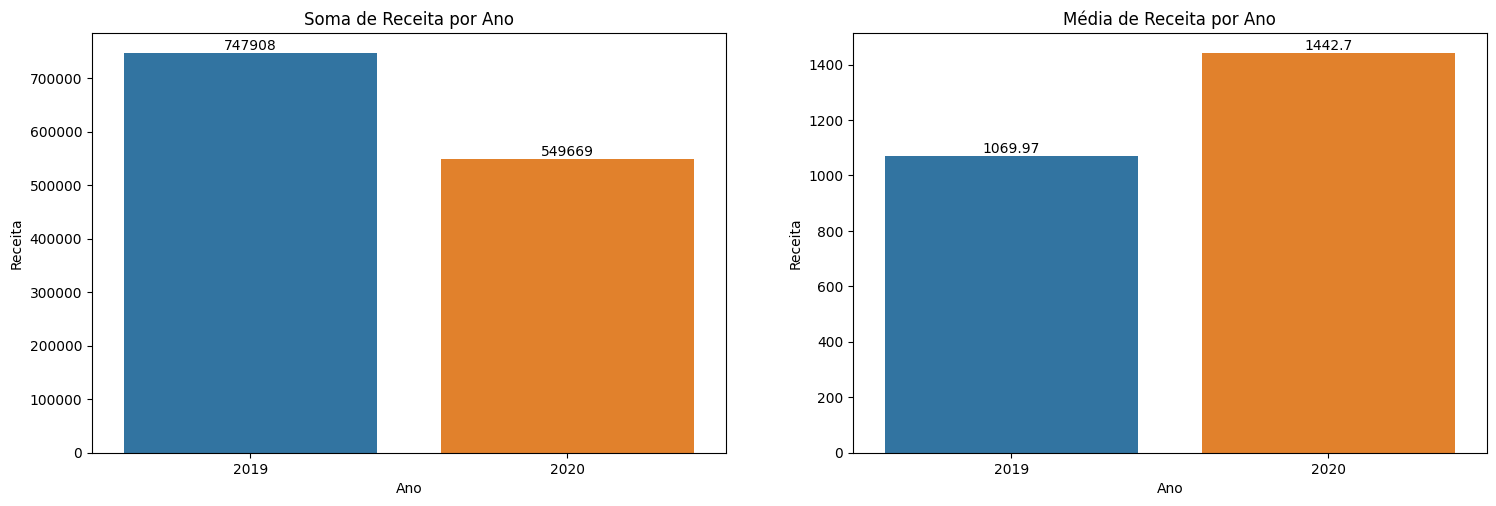

In [35]:
plt.figure(figsize=(18,12))

plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# Plotar gráfico usando Seaborn
groupedvalues = df_receita.groupby('ano').sum().reset_index()

plt.subplot(221)
ax1= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Soma de Receita por Ano')

# Exibir o gráfico
ax1.bar_label(ax1.containers[0])


groupedvalues = df_receita.groupby('ano').mean().reset_index()

plt.subplot(222)
ax= sns.barplot(x='ano', y='receita', data=groupedvalues, errwidth=0)

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Receita')
plt.title('Média de Receita por Ano')

# Exibir o gráfico
ax.bar_label(ax.containers[0])


#Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


## Vendas por mês

In [36]:
# plt.figure(figsize=(18,12))

# plt.tight_layout(pad=1.15, h_pad=1.5, w_pad=1.15, rect=None)

# # Plotar gráfico usando Seaborn
# groupedvalues = df_venda.groupby('mes').sum().reset_index()

# plt.subplot(221)
# ax1= sns.barplot(x='mes', y='venda', data=groupedvalues, errwidth=0)

# # Configurações do gráfico
# plt.xlabel('Mês')
# plt.ylabel('venda')
# plt.title('Soma de venda por mês')

# # Exibir o gráfico
# ax1.bar_label(ax1.containers[0])


# groupedvalues = df_venda.groupby('mes').mean().reset_index()

# plt.subplot(222)
# ax= sns.barplot(x='mes', y='venda', data=groupedvalues, errwidth=0)

# # Configurações do gráfico
# plt.xlabel('Mês')
# plt.ylabel('venda')
# plt.title('Média de venda por mês')

# # Exibir o gráfico
# ax.bar_label(ax.containers[0])


# #Apesar de o volume de vendas ser maior que em 2020. A média de venda foi maior em 2020. 


# Vendedores e seguradora para string

In [37]:
df_venda['vendedor'] = df_venda['vendedor'].astype(str)
df_venda['seguradora'] = df_venda['seguradora'].astype(str)
df_venda.dtypes





ano                      int64
mes                      int64
seguradora              object
vendedor                object
tot_apolices             int64
venda                  float64
data            datetime64[ns]
tot_venda              float64
dtype: object

# Mês por extenso

In [38]:
df_venda['month_name'] = df_venda['mes'].apply(lambda x:  calendar.month_name[x])
df_receita['month_name'] = df_receita['mes'].apply(lambda x:  calendar.month_name[x])

df_receita['receita'].apply(lambda x: x.replace(',', '.')).astype('float').fillna(0)

In [39]:
df_venda.columns

Index(['ano', 'mes', 'seguradora', 'vendedor', 'tot_apolices', 'venda', 'data',
       'tot_venda', 'month_name'],
      dtype='object')

# Inadimplente ou não

In [40]:
df_venda.head()

,ano,mes,seguradora,vendedor,tot_apolices,venda,data,tot_venda,month_name
0,2019,1,66,1,1,174.055,2019-01-01,174.055,January
1,2019,1,31,58,1,92.310,2019-01-01,92.310,January
2,2019,1,72,35,6,900.080,2019-01-01,5400.480,January
3,2019,1,55,20,1,7550.000,2019-01-01,7550.000,January
4,2019,1,72,58,2,84.175,2019-01-01,168.350,January


In [41]:
df_receita.sort_values(['ano', 'mes', 'seguradora']).head()

,ano,mes,seguradora,vendedor,tot_apolices,receita,tot_receita,month_name
31,2019,1,21,12,1,3225.780,3225.780,January
30,2019,1,23,20,1,110.800,110.800,January
22,2019,1,44,56,1,84.095,84.095,January
23,2019,1,44,42,1,81.800,81.800,January
24,2019,1,44,38,4,474.080,1896.320,January


In [42]:
df1 = df_venda.groupby(['ano', 'mes', 'seguradora'], as_index=False)['tot_venda'].sum()
df2 = df_receita.groupby(['ano', 'mes', 'seguradora'], as_index=False)['tot_receita'].sum()

In [43]:
np.array_equal(df1['seguradora'].unique(), df2['seguradora'].unique())

False

In [44]:
np.sort(df1['seguradora'].unique())

array(['13', '19', '21', '23', '24', '31', '33', '35', '38', '4', '41',
       '42', '43', '44', '51', '54', '55', '56', '58', '6', '62', '64',
       '66', '68', '72', '74', '75', '77', '78', '79', '81', '83'],
      dtype=object)

In [45]:
np.sort(df2['seguradora'].unique())

array(['13', '19', '21', '23', '24', '31', '35', '38', '4', '41', '42',
       '43', '44', '54', '55', '56', '58', '6', '62', '64', '66', '72',
       '74', '75', '77', '79', '81', '83'], dtype=object)

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ano          220 non-null    int64  
 1   mes          220 non-null    int64  
 2   seguradora   220 non-null    object 
 3   tot_receita  220 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 7.0+ KB


In [47]:
df_inadimplente = df1.merge(df2, how='left', on=['ano', 'mes', 'seguradora'])
df_inadimplente['valor_recebido'] = df_inadimplente['tot_receita'] - df_inadimplente['tot_venda']
df_inadimplente.head(50)

,ano,mes,seguradora,tot_venda,tot_receita,valor_recebido
0,2019,1,19,635.870000,NaN,NaN
1,2019,1,21,3621.775000,3225.780,-395.995
2,2019,1,23,230.750000,110.800,-119.950
3,2019,1,31,7496.915000,NaN,NaN
4,2019,1,38,1015.500000,NaN,NaN
5,2019,1,43,424.550000,NaN,NaN
6,2019,1,44,18295.420000,2283.325,-16012.095
7,2019,1,55,7550.000000,1283.105,-6266.895
8,2019,1,58,350.350000,350.350,0.000
9,2019,1,64,12595.760000,NaN,NaN


In [48]:
df_inadimplente[df_inadimplente['valor_recebido']>0]['mes'].value_counts().sort_index(ascending=True)

mes
1      4
2      9
3     11
4      8
5     10
6      8
7      6
8      4
9      6
10     5
11     6
12     7
Name: count, dtype: int64

In [49]:
df_inadimplente[df_inadimplente['valor_recebido']<0]['mes'].value_counts().sort_index(ascending=True)

mes
1     11
2      8
3     10
4     11
5      8
6     13
7      5
8      7
9      2
10     4
11     7
12     4
Name: count, dtype: int64

# Exportando dados

## Dados de vendas

In [50]:
df_venda.to_csv(r"./data/df_venda.csv", sep=';', decimal=',')

In [51]:
valor1 = df_venda[df_venda['ano']==2019]['venda'].sum()
valor2 = df_venda[df_venda['ano']==2019]['tot_apolices'].sum()
valor1*valor2

2619132918.284783

In [52]:
df_venda['total_venda'] = df_venda['tot_apolices']*df_venda['venda']

## Dados de receita

In [53]:
df_receita.head()

,ano,mes,seguradora,vendedor,tot_apolices,receita,tot_receita,month_name
0,2019,1,72,58,1,65.300,65.300,January
1,2019,1,72,57,4,1360.235,5440.940,January
2,2019,1,72,56,3,276.490,829.470,January
3,2019,1,72,47,2,-1707.095,-3414.190,January
4,2019,1,72,38,3,1080.745,3242.235,January


In [54]:
df_receita.to_csv(r"./data/df_receita.csv", sep=';', decimal=',')

# Modelagem

In [58]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ano           1242 non-null   int64         
 1   mes           1242 non-null   int64         
 2   seguradora    1242 non-null   object        
 3   vendedor      1242 non-null   object        
 4   tot_apolices  1242 non-null   int64         
 5   venda         1242 non-null   float64       
 6   data          1242 non-null   datetime64[ns]
 7   tot_venda     1242 non-null   float64       
 8   month_name    1242 non-null   object        
 9   total_venda   1242 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 97.2+ KB


In [59]:

# # Definir o dataframe df_venda
# df = df_venda.drop(['month_name'], axis=1)
# df['seguradora'] = df['seguradora'].astype('int64')
# df['vendedor'] = df['vendedor'].astype('int64')


# # Separar o dataframe em features (X) e target (y)
# X = df.drop('tot_venda', axis=1)
# y = df['tot_venda']

# # Separar em conjuntos de treinamento e teste
# X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# # Verificar os tamanhos dos conjuntos resultantes
# print("Tamanho do conjunto de treinamento:", len(X_treino))
# print("Tamanho do conjunto de teste:", len(X_teste))


In [60]:
# # Criar uma instância do modelo de regressão linear
# modelo = LinearRegression()

# # Treinar o modelo com os dados de treinamento
# modelo.fit(X_treino, y_treino)

# # Fazer previsões com o conjunto de teste
# y_pred = modelo.predict(X_teste)

# # Calcular o erro médio quadrático (RMSE) das previsões
# rmse = mean_squared_error(y_teste, y_pred, squared=False)

# # Imprimir o RMSE
# print("RMSE:", rmse)


In [62]:


# # Criar um DataFrame com as previsões e os valores reais
# df_pred = pd.DataFrame({'y_teste': y_teste, 'y_pred': y_pred})

# # Plotar o gráfico com a regressão linear
# sns.lmplot(x='y_teste', y='y_pred', data=df_pred, height=6, line_kws={'color': 'red'}, ci=None)
# plt.title('Regressão Linear - Valores Reais vs. Previsões')
# plt.xlabel('Valores Reais')
# plt.ylabel('Previsões')
# plt.show()


## Análise de série temporal venda

### Preparandos os dados para forecasting

In [63]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ano           1242 non-null   int64         
 1   mes           1242 non-null   int64         
 2   seguradora    1242 non-null   object        
 3   vendedor      1242 non-null   object        
 4   tot_apolices  1242 non-null   int64         
 5   venda         1242 non-null   float64       
 6   data          1242 non-null   datetime64[ns]
 7   tot_venda     1242 non-null   float64       
 8   month_name    1242 non-null   object        
 9   total_venda   1242 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 97.2+ KB


C:\Users\feh_s\AppData\Local\Temp\ipykernel_29728\1646648382.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['data'] = df_2020['data'] = pd.to_datetime(df_2020['data'], format='%Y-%m')
C:\Users\feh_s\AppData\Local\Temp\ipykernel_29728\1646648382.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['data'] = df_2020['data'].dt.to_period('M')


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='tot_venda'>)

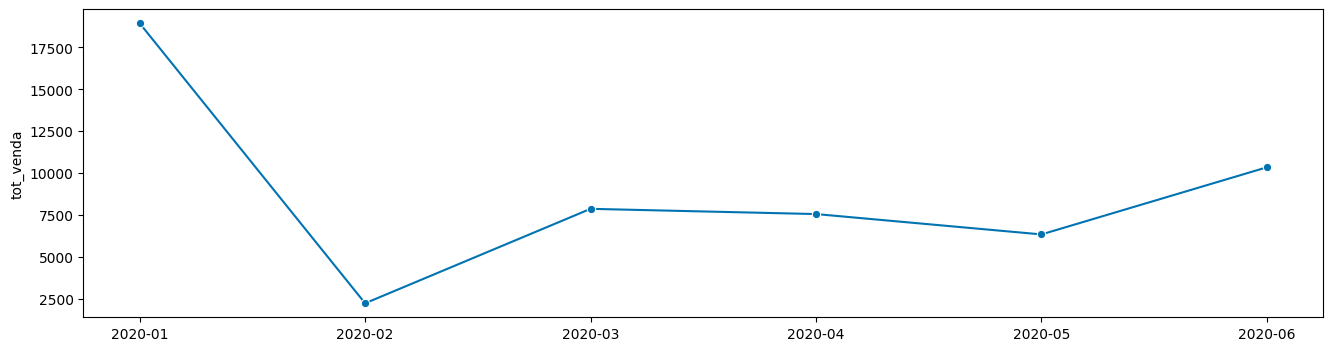

In [64]:
# Definir o dataframe df_venda
# df = df_venda.drop(['month_name'], axis=1)
df_venda['seguradora'] = df_venda['seguradora'].astype('int64')
df_venda['vendedor'] = df_venda['vendedor'].astype('int64')

df_2020 = df_venda[df_venda['data'].dt.year == 2020]
df_2020['data'] = df_2020['data'] = pd.to_datetime(df_2020['data'], format='%Y-%m')
df_2020['data'] = df_2020['data'].dt.to_period('M')
series_vendas_media = df_2020.groupby('data').mean('tot_venda')['tot_venda']

# series_vendas_media = df_2020.set_index('data')['venda']

plot_series(series_vendas_media)

### fh

In [134]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2020-07", periods=6, freq="M")), is_relative=False
)
fh

ForecastingHorizon(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'], dtype='period[M]', is_relative=False)

In [135]:
cutoff = pd.Period("2020-07", freq="M")
fh.to_relative(cutoff)
fh.to_absolute(cutoff)

ForecastingHorizon(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'], dtype='period[M]', is_relative=False)

In [136]:
fh = np.array([1, 6])

In [148]:
fh = np.arange(1, 7)
fh

array([1, 2, 3, 4, 5, 6])

In [138]:
df_venda['periodo'] = df_venda['data'].dt.to_period('M')
y = df_venda.groupby('periodo').mean('tot_venda')['tot_venda']

### Decompose

In [139]:
y1

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

<Figure size 1000x800 with 0 Axes>

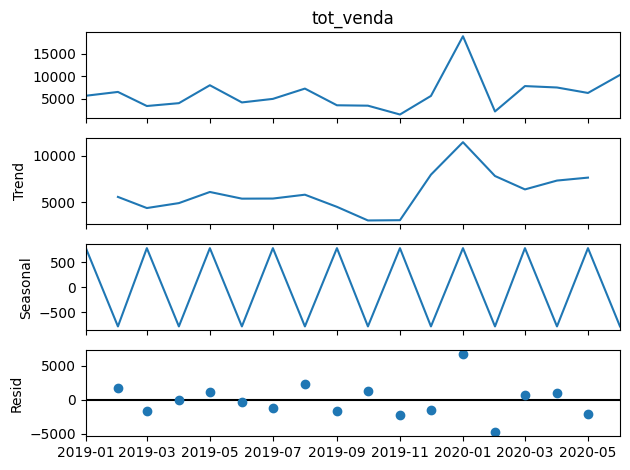

In [140]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_decompose = pd.DataFrame(y).reset_index()
df_decompose['periodo'] = df_decompose['periodo'].dt.to_timestamp()
df_decompose = df_decompose.set_index('periodo')

resultado_decompose = seasonal_decompose(df_decompose['tot_venda'], period=2)

fig = plt.figure(figsize=(10,8))
fig = resultado_decompose.plot()

plt.show()

In [141]:
(
    df_venda[
        (df_venda['mes'] == 1) 
        & (df_venda['ano'] == 2020) 
        # & (df_venda['tot_venda'] == df_venda['tot_venda'].max())
    ].describe()
)

,ano,mes,seguradora,vendedor,tot_apolices,venda,data,tot_venda,total_venda
count,79.0,79.0,79.000000,79.000000,79.000000,79.000000,79,79.000000,79.000000
mean,2020.0,1.0,53.012658,26.670886,3.227848,3829.979684,2020-01-01 00:00:00,18945.156076,18945.156076
min,2020.0,1.0,6.000000,1.000000,1.000000,-2522.425000,2020-01-01 00:00:00,-17656.975000,-17656.975000
25%,2020.0,1.0,31.000000,16.000000,1.000000,89.047500,2020-01-01 00:00:00,104.790000,104.790000
50%,2020.0,1.0,66.000000,20.000000,2.000000,333.235000,2020-01-01 00:00:00,588.960000,588.960000
75%,2020.0,1.0,72.000000,38.000000,4.000000,1305.415000,2020-01-01 00:00:00,3543.925000,3543.925000
max,2020.0,1.0,78.000000,59.000000,30.000000,148598.290000,2020-01-01 00:00:00,891589.740000,891589.740000
std,0.0,0.0,20.967309,15.827371,3.974113,17292.962814,NaN,102913.246078,102913.246078


### SKTime

2020-06-30   NaN
2020-07-31   NaN
2020-08-31   NaN
2020-09-30   NaN
2020-10-31   NaN
2020-11-30   NaN
2020-12-31   NaN
Freq: M, Name: tot_venda, dtype: float64
2020-01-31    18945.156076
2020-02-29     2228.314478
2020-03-31     7867.000662
2020-04-30     7554.570000
2020-05-31     6339.507569
2020-06-30    10347.557283
Freq: M, Name: tot_venda, dtype: float64


KeyError: 'y'

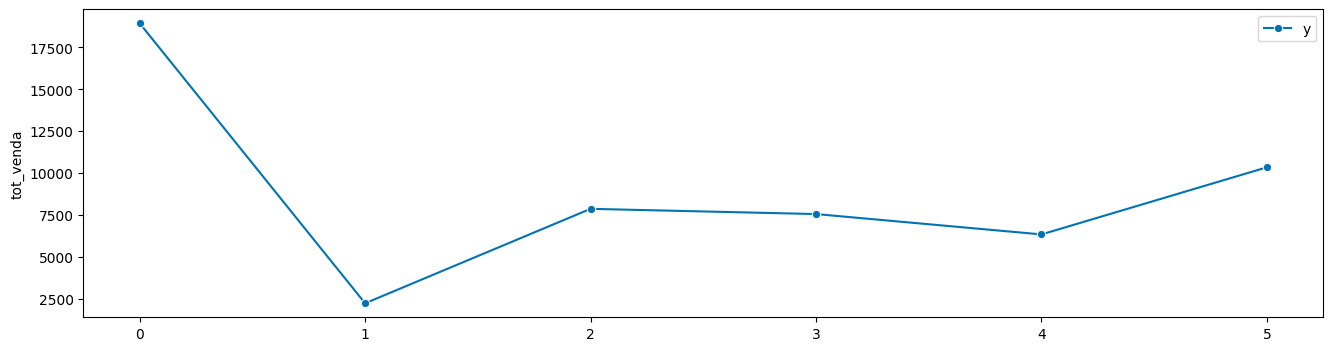

In [142]:
# Crie o objeto forecaster
forecaster = NaiveForecaster(strategy="last", sp=3)

# Ajuste o forecaster aos dados de vendas

forecaster.fit(y=series_vendas_media)

# Faça a previsão
y_pred = forecaster.predict(fh)
print(y_pred)
print(series_vendas_media)
# Plote as previsões e os dados passados
plot_series(series_vendas_media, y_pred, labels=["y", "y_pred"])


#### Todos os anos

In [ ]:
print(series_vendas_media)
print(y)

2020-01    18945.156076
2020-02     2228.314478
2020-03     7867.000662
2020-04     7554.570000
2020-05     6339.507569
2020-06    10347.557283
Freq: M, Name: tot_venda, dtype: float64
0         174.055
1          92.310
2        5400.480
3        7550.000
4         168.350
          ...    
1237      942.525
1238    15751.680
1239       33.860
1240       72.360
1241     1045.660
Name: tot_venda, Length: 1242, dtype: float64


2019-12     3601.488109
2020-01     3513.022910
2020-02     1548.667846
2020-03     5679.891084
2020-04    18945.156076
2020-05     2228.314478
Freq: M, Name: tot_venda, dtype: float64
periodo
2019-01     5719.675264
2019-02     6566.895014
2019-03     3437.411981
2019-04     4070.787687
2019-05     8053.846493
2019-06     4235.017059
2019-07     5022.625500
2019-08     7309.171447
2019-09     3601.488109
2019-10     3513.022910
2019-11     1548.667846
2019-12     5679.891084
2020-01    18945.156076
2020-02     2228.314478
2020-03     7867.000662
2020-04     7554.570000
2020-05     6339.507569
2020-06    10347.557283
Freq: M, Name: tot_venda, dtype: float64


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='tot_venda'>)

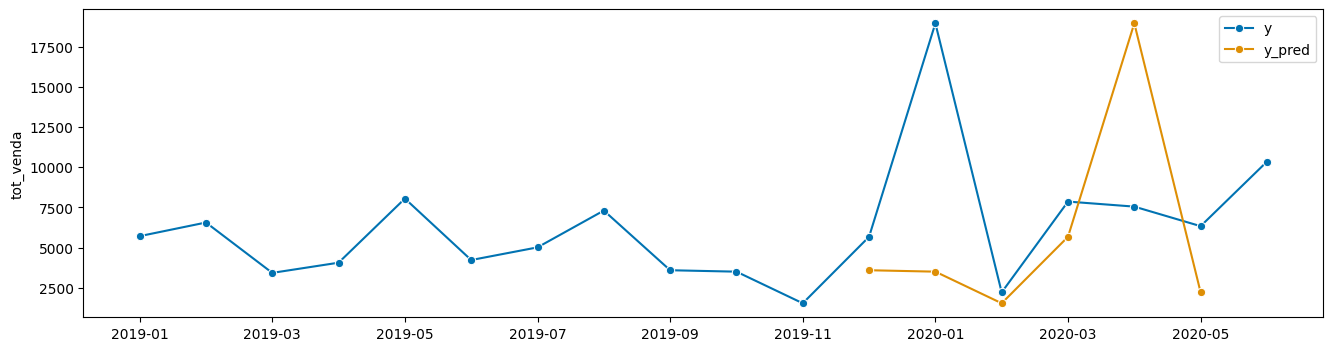

In [ ]:
df_venda['periodo'] = df_venda['data'].dt.to_period('M')
y = df_venda.groupby('periodo').mean('tot_venda')['tot_venda']
y_train, y_test = temporal_train_test_split(y, test_size=30)

# Crie o objeto forecaster
forecaster = NaiveForecaster(strategy="last", sp=3)

# Ajuste o forecaster aos dados de vendas

forecaster.fit(y)

# Faça a previsão
y_pred = forecaster.predict(fh)
print(y_pred)
print(y)
# Plote as previsões e os dados passados
plot_series(y, y_pred, labels=["y", "y_pred"])


# Em comparação com o forecasting do Power BI ficou muito parecido. O desenho segue a mesma estrutura. Com valores muito parecidos. Mas voltanod 1 mês, afim de comparação, o skitime se sai melhor. Enquando a diferença do real 
# para o power BI, em Julho, deu R$5.519,75 o primeiro modelo do skitime uma diferença de R$2.480,55.

In [150]:
from sktime.forecasting.model_selection import temporal_train_test_split

df_venda['periodo'] = df_venda['data'].dt.to_period('M')
y = df_venda.groupby('periodo').mean('tot_venda')['tot_venda']
y_train, y_test = temporal_train_test_split(y, test_size=0.3)

# Crie o objeto forecaster
forecaster = NaiveForecaster(strategy="last", sp=3)

# Ajuste o forecaster aos dados de vendas

forecaster.fit(y_test)

# Faça a previsão
y_pred = forecaster.predict(fh)
print(y_pred)
print(y_test)
# Plote as previsões e os dados passados
# plot_series(y, y_pred, labels=["y", "y_pred"])


2020-07     7554.570000
2020-08     6339.507569
2020-09    10347.557283
2020-10     7554.570000
2020-11     6339.507569
2020-12    10347.557283
Freq: M, Name: tot_venda, dtype: float64
periodo
2020-01    18945.156076
2020-02     2228.314478
2020-03     7867.000662
2020-04     7554.570000
2020-05     6339.507569
2020-06    10347.557283
Freq: M, Name: tot_venda, dtype: float64


In [151]:
from sktime.performance_metrics.forecasting import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(rmse)

25466753.49019265


#### Exportando SKTime

In [ ]:
df

,ano,mes,seguradora,vendedor,tot_apolices,venda,data,tot_venda,total_venda
0,2019,1,66,1,1,174.055,2019-01-01,174.055,174.055
1,2019,1,31,58,1,92.310,2019-01-01,92.310,92.310
2,2019,1,72,35,6,900.080,2019-01-01,5400.480,5400.480
3,2019,1,55,20,1,7550.000,2019-01-01,7550.000,7550.000
4,2019,1,72,58,2,84.175,2019-01-01,168.350,168.350
...,...,...,...,...,...,...,...,...,...
1237,2020,6,66,9,5,188.505,2020-06-01,942.525,942.525
1238,2020,6,72,2,7,2250.240,2020-06-01,15751.680,15751.680
1239,2020,6,79,17,1,33.860,2020-06-01,33.860,33.860
1240,2020,6,66,42,1,72.360,2020-06-01,72.360,72.360


In [ ]:
df = df_y = pd.DataFrame(y_pred).reset_index().rename(columns={'index': 'data'})
df.to_csv(path_or_buf=r'C:\Users\feh_s\case_wiz_co\data\SKTime_previsoes.csv', sep=';', decimal=',')

### ARIMA

##### Decompose

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

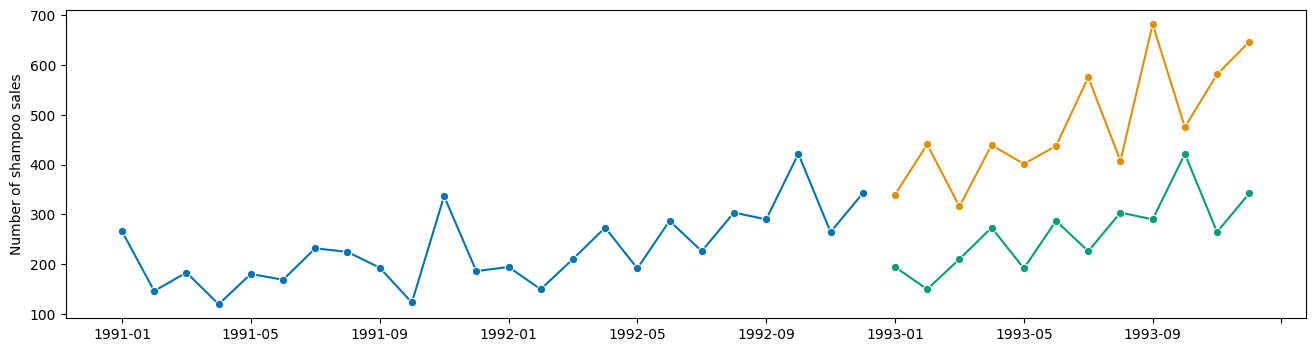

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.datasets import load_shampoo_sales
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series

y = load_shampoo_sales()
y_train, y_test = temporal_train_test_split(y, test_size=12)
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train, fh=fh)
y_pred = forecaster.predict()

plot_series(y_train, y_test, y_pred)

In [ ]:
pd.DataFrame(y).reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype    
---  ------                   --------------  -----    
 0   Period                   36 non-null     period[M]
 1   Number of shampoo sales  36 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 704.0 bytes


In [ ]:
# Definir o dataframe df_venda
df = df_venda.drop(['month_name'], axis=1)
df['seguradora'] = df['seguradora'].astype('int64')
df['vendedor'] = df['vendedor'].astype('int64')


# Separar o dataframe em features (X) e target (y)
X = df.drop('tot_venda', axis=1)
y = df['tot_venda']

# Separar em conjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar os tamanhos dos conjuntos resultantes
print("Tamanho do conjunto de treinamento:", len(X_treino))
print("Tamanho do conjunto de teste:", len(X_teste))

Tamanho do conjunto de treinamento: 869
Tamanho do conjunto de teste: 373


(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

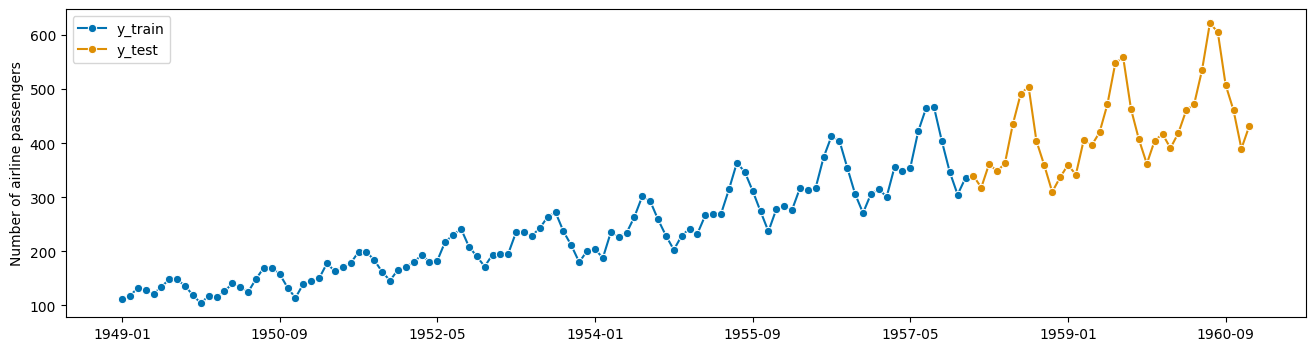

In [ ]:
# Importando os dados, dividindo e criando o horizonte de previsões (fh)
from sktime.datasets import load_airline
y1 = load_airline()
y_train, y_test = temporal_train_test_split(y1)
fh = np.arange(len(y_test)) + 1
plot_series(y_train, y_test, labels=["y_train", "y_test"])

In [ ]:
# Verificar se há datas faltantes
print(pd.date_range(start=df['data'].min(), end=df['data'].max()).difference(df['data']))

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25',
               '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
               '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', length=500, freq=None)


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='tot_venda'>)

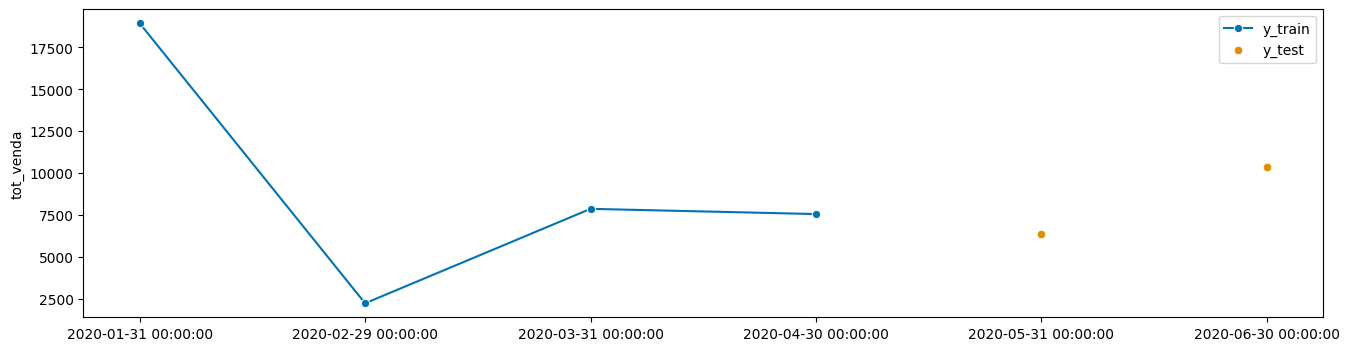

In [ ]:
df_2020 = df[df['data'].dt.year == 2020]
series_vendas_media = df_2020.groupby(pd.Grouper(key='data', freq='M'))['tot_venda'].mean()

y_train, y_test = temporal_train_test_split(series_vendas_media)

fh = np.arange(len(y_test)) + 1

plot_series(y_train, y_test, labels=["y_train", "y_test"])

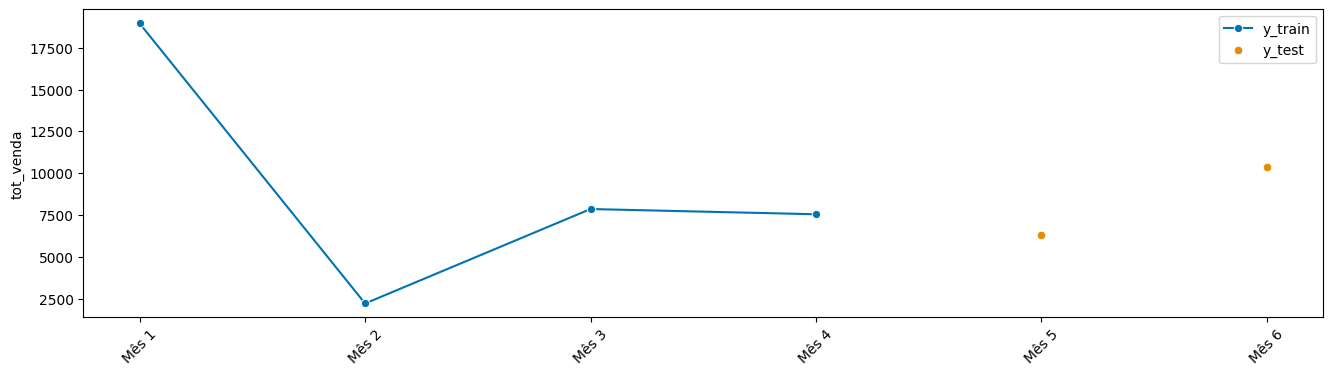

In [ ]:
# Plotar a série de treinamento e teste
fig, ax = plot_series(y_train, y_test, labels=["y_train", "y_test"])

# Definir os rótulos dos meses no eixo x
ax.set_xticks(range(len(y_train) + len(y_test)))
ax.set_xticklabels([f'Mês {i+1}' for i in range(len(y_train) + len(y_test))])

# Rotacionar os rótulos para facilitar a leitura
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.show()

### Linear regression com forecasting

In [ ]:
from sktime.forecasting.compose._reduce import _Reducer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sktime.performance_metrics.forecasting import mean_squared_percentage_error
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series


df_2020 = df[df['data'].dt.year == 2020]
series_vendas_media = df_2020.groupby(pd.Grouper(key='data', freq='M'))['tot_venda'].mean()

y_train, y_test = temporal_train_test_split(series_vendas_media)

y_train = pd.Series(y_train.values, index=y_train.index)  # Converter y_train para o formato pd.Series
y_test = pd.Series(y_test.values, index=y_test.index)  # Converter y_test para o formato pd.Series

fh = np.arange(len(y_test)) + 1



linreg = LinearRegression()
linreg_forecaster = _Reducer(linreg, window_length=6)
linreg_forecaster.fit(y_train, fh)
y_linreg_pred = linreg_forecaster.predict(fh)

dtr = DecisionTreeRegressor()
dtr_forecaster = _Reducer(dtr, window_length=12)
dtr_forecaster.fit(y_train, fh=fh)
y_dtr_pred = dtr_forecaster.predict(fh)

plot_series(y_train, y_test, y_linreg_pred, y_dtr_pred, labels=['y_train', 'y_test', 'y_linreg_pred', 'y_dtr_pred'])

print('SMAPE usando Regressão Linear: ', mean_squared_percentage_error(y_test, y_linreg_pred))
print('SMAPE usando Árvore de Decisão: ', mean_squared_percentage_error(y_test, y_dtr_pred))


ValueError: (time) indices of series 0 are not contained in index of series 0, extra indices are: DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30'], dtype='datetime64[ns]', freq='M')

In [ ]:
# Agrupa as vendas por mês e calcula a média dos valores de venda
series_vendas_media = df.groupby(pd.Grouper(key='data', freq='M'))['venda'].mean()

# Divide a série em conjunto de treinamento e teste usando temporal_train_test_split
y_train, y_test = temporal_train_test_split(series_vendas_media)

# Define o horizonte de previsões (fh) como uma sequência de números de 1 até o tamanho do conjunto de teste
fh = np.arange(len(y_test)) + 1

# Plota a série de treinamento e teste usando plot_series, com rótulos "y_train" e "y_test"
plot_series(y_train, y_test, labels=["y_train", "y_test"])


array([ 5.72853022e+03,  3.05128270e+04, -5.70771518e+03, -3.13716276e+03,
       -1.49493736e+03,  1.36193887e+03,  3.79559208e+04,  6.16345193e+03,
        4.51976142e+03,  1.12019023e+04, -1.43458954e+03, -6.11963825e+03,
        3.00429556e+04, -1.28059289e+03,  3.08892163e+04, -3.86897063e+03,
        6.43567410e+03, -4.43735910e+03, -2.71512502e+03, -1.39768141e+03,
       -4.70883708e+03,  2.59698980e+03,  2.67952878e+03,  2.28136043e+04,
       -1.07366033e+02,  3.22118478e+02, -2.05693007e+03,  5.45493625e+02,
        1.41683450e+04, -2.34417117e+03,  5.86702084e+04,  7.39641436e+03,
       -1.71610678e+03,  3.38560063e+04,  1.54472460e+05,  1.30489215e+04,
       -3.85707896e+03,  2.02590878e+03,  9.89893586e+03,  2.52167925e+04,
       -2.61102678e+03,  3.50300307e+04, -5.91368330e+03,  8.22459887e+03,
        6.87520696e+03, -1.52511628e+03,  3.33444155e+03,  4.50950218e+04,
        2.92146684e+04,  2.65476095e+04,  3.15107538e+03, -2.68043229e+03,
        5.40917687e+03, -

In [ ]:
meses_pred_idx = pd.date_range(start='2020-07-01', end='2020-12-31', freq='M')

In [ ]:
df_previsoes = pd.DataFrame(index=meses_pred_idx, columns=['tot_venda'], data=df)


In [ ]:
df_previsoes

,tot_venda
2020-07-31,NaN
2020-08-31,NaN
2020-09-30,NaN
2020-10-31,NaN
2020-11-30,NaN
2020-12-31,NaN


In [ ]:
import pandas as pd

# Crie um DataFrame com as datas de julho a dezembro
meses_pred = pd.date_range(start='2023-07-01', end='2023-12-31', freq='M')

# Crie um DataFrame vazio para armazenar as previsões
df_prox_meses = pd.DataFrame(index=meses_pred)

# Preencha as colunas com os valores nulos para as features relevantes
df_prox_meses['feature1'] = None  # Substitua None pelos valores correspondentes às features para julho a dezembro
df_prox_meses['feature2'] = None
# Adicione as demais features necessárias para as previsões

# Faça as previsões para os próximos meses
prox_meses_pred = modelo.predict(df_prox_meses)

# Crie um DataFrame com as previsões para julho a dezembro
df_previsoes = pd.DataFrame(index=meses_pred, columns=['tot_venda'], data=prox_meses_pred)
